In [27]:
# imports
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

# matplotlib preferences
mpl.rcdefaults()  # reset
plt.rc('axes', titlesize=20, labelsize=15, labelpad=2)
plt.rc('axes.formatter', limits=[-4, 4])
plt.rc('ytick', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('lines', linewidth=1, markersize=5)
plt.rc('figure', figsize=(5, 5))
#ax._get_lines.get_next_color()
# print(plt.rcParams) # all parameters

In [34]:
data_tim = pd.read_csv("large_times.csv")
#data_tim = pd.read_csv("varied_times.csv")

print("keys:")
display(data_tim.keys())

cores = np.unique(data_tim["cores"])
print("cores:", cores)

print("dataframe:")
display(data_tim)

keys:


Index(['iterations', 'fitness', 'num_node', 'Concentrate gor amount',
       'Concentrate waste amount', 'Tail gor amount', 'Tail waste amount',
       'ppk gor', 'ppk conc', 'config', 'cores', 'runtime'],
      dtype='object')

cores: [ 2  4  8 16 32]
dataframe:


,iterations,fitness,num_node,Concentrate gor amount,Concentrate waste amount,Tail gor amount,Tail waste amount,ppk gor,ppk conc,config,cores,runtime
0,8790,381.437,15,0,0,0,0,100,500,11-3-11-3-0-5-4-13-10-5-7-3-1-5-8-5-16-5-12-15...,2,59.37570
1,16880,425.206,15,0,0,0,0,100,500,6-12-7-14-10-0-5-11-12-14-13-1-13-3-0-14-4-3-6...,4,243.94100
2,8270,358.996,15,0,0,0,0,100,500,4-1-4-7-9-12-11-7-15-1-12-16-14-8-14-3-13-1-0-...,8,65.32870
3,9847,425.206,15,0,0,0,0,100,500,3-9-4-13-6-6-8-1-2-3-5-2-14-13-9-11-4-9-0-1-12...,16,64.97980
4,8222,383.201,15,0,0,0,0,100,500,2-13-14-9-16-0-7-0-2-9-11-9-10-0-8-9-12-14-4-0...,32,23.12500
5,9353,403.963,15,0,0,0,0,100,500,13-5-1-2-8-14-6-13-12-15-14-4-2-14-13-2-11-6-3...,2,227.72200
6,8254,398.764,15,0,0,0,0,100,500,11-13-3-6-11-4-9-4-2-6-1-10-13-10-5-4-16-4-7-4...,4,35.73490
7,8452,417.714,15,0,0,0,0,100,500,2-8-10-2-5-10-7-14-13-12-1-7-4-0-2-11-3-15-0-1...,8,56.86280
8,8323,398.764,15,0,0,0,0,100,500,1-3-9-8-12-8-1-8-2-13-3-4-10-14-5-3-16-13-14-3...,16,10.61610
9,11397,392.882,15,0,0,0,0,100,500,10-14-3-6-10-9-3-1-2-11-12-7-14-7-5-15-6-14-16...,32,97.93840


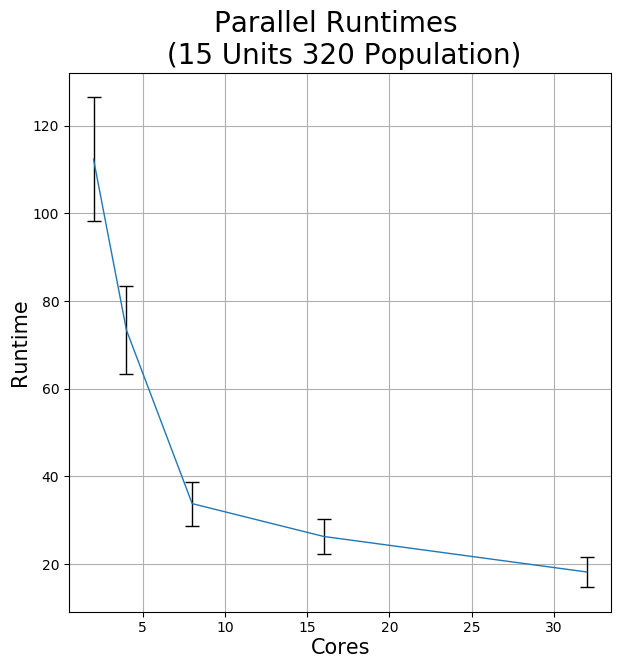

In [54]:
#find the times per iteration
tim_tpi = data_big.drop(['num_node', 'Concentrate gor amount',
       'Concentrate waste amount', 'Tail gor amount', 'Tail waste amount'], axis=1)
#tim_tpi["runtime"] = tim_tpi["runtime"] / tim_tpi["iterations"]

# group by cores
avg = tim_tpi.groupby("cores").mean()
ste = tim_tpi.groupby("cores").sem()

fig, ax = plt.subplots(figsize=[7, 7])
avg.plot(y="runtime", ax=ax, use_index=True, yerr=ste["runtime"], capsize=5, legend=False, style='o-', ecolor='k')
plt.gca().set(title="Parallel Runtimes \n (15 Units 320 Population)", ylabel="Runtime", xlabel="Cores")
plt.grid()

fig = plt.gcf()
fig.savefig("HPC_Runtimes.png")